
# Project: Investigate a Dataset - [TMDb movie data]
 Welcome to the Investigate a Dataset project!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
# </ul>

# Introduction About This Dataset
This data set contains information about "10,000" movies collected from The Movie Database (TMDb),
including user ratings and revenue.
[Dataset link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv)

_**dataset has the following features:-**_
* imdb_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
<ul>
<li>director - The name of Director</li>
<li>budget - The budget in which the movie was made.</li>
<li>budget_adj - show the budget and revenue of the associated movie in terms of 2010 dollars,</li>
<li>genres - The genre of the movie, Action, Comedy ,Thriller etc.</li>
<li>homepage - A link to the homepage of the movie.</li>
<li>keywords - The keywords or tags related to the movie.</li>
<li>original_title - The title of the movie before translation or adaptation.</li>
<li>overview - A brief description of the movie.</li>
<li>popularity - A numeric quantity specifying the movie popularity.</li>
<li>production_companies - The production house of the movie.</li>
<li>release_date - The date on which it was released.</li>
<li>release_year - The year on which it was released.</li>
<li>revenue - The worldwide revenue generated by the movie.</li>
<li>revenue_adj-show the revenue of the associated movie in terms of 2010 dollars</li>
<li>runtime - The running time of the movie in minutes.</li>
<li>tagline - Movie's tagline.</li>
<li>vote_average - average ratings the movie recieved.</li>
<li>vote_count - the count of votes recieved</li>

</ul>



### Questions that will be answered:
<ul>
<li>Which movie have high popularity over this years ?</li>
<li>Is there a relation between budget and revenue ?</li>
<li>What kinds of properties are associated with movies that have high revenues ?</li>
<li>Which Genres have high popularity in specific year or period time ? </li>

</ul>

<a id='wrangling'></a>
### Data Wrangling



In [1]:
!pip install -U pandas==0.25.0.

Requirement already up-to-date: pandas==0.25.0. in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
#load data and import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")


In [3]:
df["genres"].head(2)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

In [4]:
#Find the missing values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
#Delete columns that I don't need to answer my questions
remove_columns_list=["imdb_id" ,"id","cast","homepage","director","keywords" ,"overview" , "tagline"]
df.drop(remove_columns_list , axis=1 , inplace=True)


In [6]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [7]:
#Delete rows that contain a missing value
df.dropna(inplace=True)

In [8]:
#Ensure that there is no missing value
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [9]:
#Ensure that there are no duplicate values
print(sum(df.duplicated()))
df[df.duplicated()==True]

1


,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
#We will make a change "release_date" type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9827 non-null float64
budget                  9827 non-null int64
revenue                 9827 non-null int64
original_title          9827 non-null object
runtime                 9827 non-null int64
genres                  9827 non-null object
production_companies    9827 non-null object
release_date            9827 non-null object
vote_count              9827 non-null int64
vote_average            9827 non-null float64
release_year            9827 non-null int64
budget_adj              9827 non-null float64
revenue_adj             9827 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.0+ MB


In [11]:
df["release_date"]= pd.to_datetime(df["release_date"])

In [12]:
#Ensure that the change has occurred
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 10865
Data columns (total 13 columns):
popularity              9827 non-null float64
budget                  9827 non-null int64
revenue                 9827 non-null int64
original_title          9827 non-null object
runtime                 9827 non-null int64
genres                  9827 non-null object
production_companies    9827 non-null object
release_date            9827 non-null datetime64[ns]
vote_count              9827 non-null int64
vote_average            9827 non-null float64
release_year            9827 non-null int64
budget_adj              9827 non-null float64
revenue_adj             9827 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.0+ MB


In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9827.000000,9.827000e+03,9.827000e+03,9827.000000,9827.000000,9827.000000,9827.000000,9.827000e+03,9.827000e+03
mean,0.692004,1.609461e+07,4.398487e+07,102.673858,238.165157,5.967874,2000.904142,1.931318e+07,5.673501e+07
std,1.034731,3.214198e+07,1.222895e+08,28.201627,601.519753,0.914524,13.032228,3.559418e+07,1.510850e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.230927,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.417317,1.250000e+05,0.000000e+00,100.000000,45.000000,6.000000,2005.000000,2.025573e+05,0.000000e+00
75%,0.773583,1.900000e+07,3.052564e+07,112.000000,172.000000,6.600000,2011.000000,2.432644e+07,4.248161e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


**We note here that there is a running time of the movie equal to zero, which is illogical**

In [14]:
df[df["runtime"]==0]

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,0,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
334,0.357654,0,0,Ronaldo,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.000000e+00,0.0
445,0.218528,0,0,The Exorcism of Molly Hartley,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,0.000000e+00,0.0
486,0.176744,0,0,If There Be Thorns,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0.000000e+00,0.0
1289,0.037459,3250000,0,Treehouse,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0
1293,0.036904,0,0,Tim Maia,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014,0.000000e+00,0.0
3329,0.082898,0,0,"Grande, grosso e Verdone",0,Family,Filmauro,2008-03-07,35,5.3,2008,0.000000e+00,0.0
3857,0.095583,0,0,Cell 213,0,Horror,Access Motion Pictures,2011-06-10,13,5.2,2011,0.000000e+00,0.0
4944,0.026459,0,0,How to Fall in Love,0,Comedy|Romance|TV Movie,Annuit Coeptis Entertainment Inc.|Annuit Coept...,2012-07-21,11,4.7,2012,0.000000e+00,0.0
5695,0.417739,0,0,Skinwalker Ranch,0,Thriller|Horror|Science Fiction,DeepStudios,2013-10-30,27,4.3,2013,0.000000e+00,0.0


In [15]:
#So I searched for the running time of these movies and modified the values

index=[92 , 334 ,445 ,486 ,1289 ,1293 ,3329 ,3857 ,4944 ,5695 , 5920 , 5938 , 6934]
value=[93 ,92 ,96,100 ,100 , 140 ,135 ,109 ,84 ,86 ,91 ,112 , 90]
my_list=list(zip(index , value))
for ind , val in my_list:
    df.loc[ind , 'runtime']=val


In [16]:
df[df["runtime"]==0]

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [17]:
df[df["revenue"]==0]

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,2.331636,20000000,0,Survivor,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,1.876037,0,0,Mythica: The Necromancer,93,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
93,1.872696,10000000,0,Vice,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,2015-01-16,181,4.1,2015,9.199996e+06,0.0
100,1.724712,0,0,Frozen Fever,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2015-03-09,475,7.0,2015,0.000000e+00,0.0
101,1.661789,0,0,High-Rise,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,2015-09-26,161,5.4,2015,0.000000e+00,0.0
103,1.646664,0,0,Spooks: The Greater Good,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,2015-04-11,114,5.6,2015,0.000000e+00,0.0
116,1.380320,0,0,The Scorpion King: The Lost Throne,105,Action|Fantasy|Adventure,Universal Pictures,2015-01-09,22,4.5,2015,0.000000e+00,0.0


In [18]:
revenue_mean=df["revenue"].mean()
df['revenue'].replace(to_replace = 0, value =revenue_mean, inplace=True)

In [19]:
df[df["revenue"]==0]

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Cleaning part summary
<ul>
<li>Unnecessary columns removed</li>
<li>Missing values are handled</li>
<li>Duplication is handled</li>
<li>Rows have 0 runtime are handles</li>
<li>data type correction</li>
</ul>


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What kinds of properties are associated with movies that have high revenues ?)

In [20]:
df_cor=df.corr()

In [21]:
# I am trying to find out what are the variables most related to revenue
df_cor

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.539464,0.633491,0.157207,0.803054,0.235540,0.109546,0.506022,0.606788
budget,0.539464,1.000000,0.691474,0.215044,0.627352,0.093148,0.136906,0.968355,0.616663
revenue,0.633491,0.691474,1.000000,0.158680,0.768956,0.163214,0.075716,0.656100,0.894883
runtime,0.157207,0.215044,0.158680,1.000000,0.184446,0.179652,-0.128884,0.249805,0.198684
vote_count,0.803054,0.627352,0.768956,0.184446,1.000000,0.276996,0.123684,0.580791,0.704247
vote_average,0.235540,0.093148,0.163214,0.179652,0.276996,1.000000,-0.136173,0.106624,0.211880
release_year,0.109546,0.136906,0.075716,-0.128884,0.123684,-0.136173,1.000000,0.034990,-0.056881
budget_adj,0.506022,0.968355,0.656100,0.249805,0.580791,0.106624,0.034990,1.000000,0.641181
revenue_adj,0.606788,0.616663,0.894883,0.198684,0.704247,0.211880,-0.056881,0.641181,1.000000


Text(0,0.5,'variables')

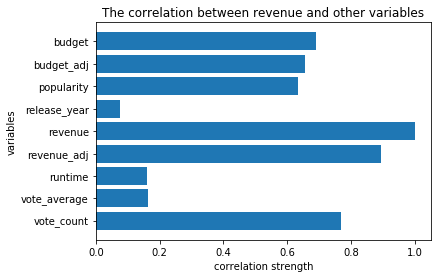

In [22]:
plt.gca().invert_yaxis()
plt.barh(df_cor["revenue"].index ,df_cor["revenue"]);
plt.title("The correlation between revenue and other variables")
plt.xlabel("correlation strength")
plt.ylabel("variables")

As you can see, the most variables affecting revenue are: **budget , vote_count , popularity 
I prove this by mean and scatter In the following codes

In [23]:
high_revenue= df[df["revenue"] >= df["revenue"].median()]
low_revenue= df[df["revenue"] < df["revenue"].median()]

print(f"compare in Budget {high_revenue['budget'].mean() , low_revenue['budget'].mean()}")
print(f"compare in vote count{high_revenue['vote_count'].mean() , low_revenue['vote_count'].mean()}")
print(f"compare in popularity{high_revenue['popularity'].mean() , low_revenue['popularity'].mean()}")


compare in Budget (17634121.97738764, 12045364.894347986)
compare in vote count(275.7957865168539, 139.18840044329517)
compare in popularity(0.7265778925561797, 0.6010659327669006)


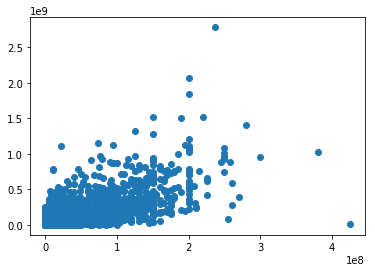

In [24]:
#there is a positive correlation 
plt.scatter(df['budget'],df['revenue'])

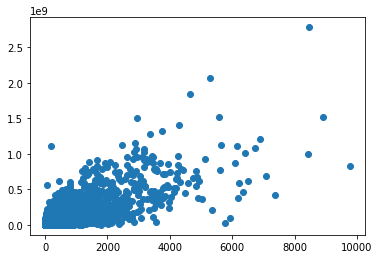

In [25]:
#there is a positive correlation 
plt.scatter(df['vote_count'],df['revenue'])

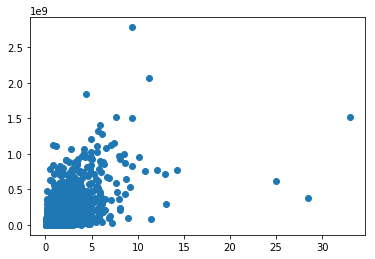

In [26]:
#there is a positive correlation 
plt.scatter(df['popularity'],df['revenue'])

### Research Question 2  (Which movie have high popularity over this years!)

In [27]:
def high_movie_popularity(year1 = 0 , year2 = 0) :
    ''' this function will give us the most popular Movies 
        Parameters :
        year1 : int b
               if you not give any number the function will give you insights of all years
               if you give a specific year the function will give you insights of this years
        year2 : int (year between year_1 to 2016)
                if you give a specific year the function will give you insights between year_1 and year_2
    '''
    sorted_popularity = df.sort_values(by ='popularity',ascending= False)
    if year2 == 0 :
        year2 = year1
    if year1 != 0 :
        sorted_popularity.query('release_year >= @year1 and release_year <= @year2',inplace = True)
        
    plt.subplots(figsize=(10,8))
    plt.gca().invert_yaxis()
    plt.barh(sorted_popularity['original_title'].head(10),sorted_popularity['popularity'].head(10))

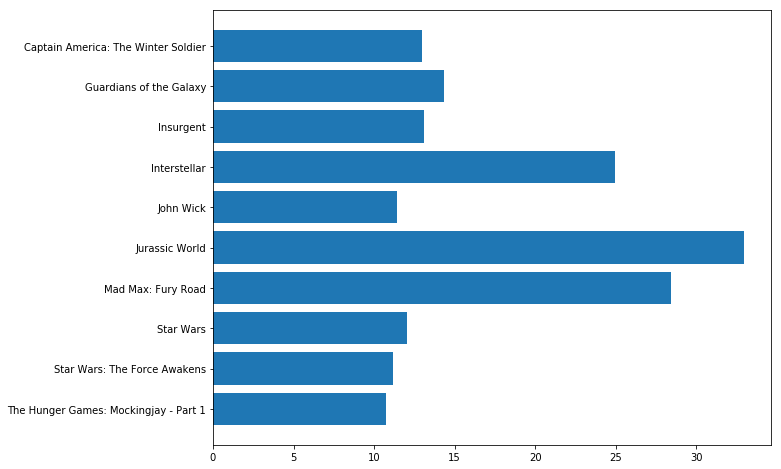

In [28]:
high_movie_popularity()

__jurassic world__: movie have the most popularity all years

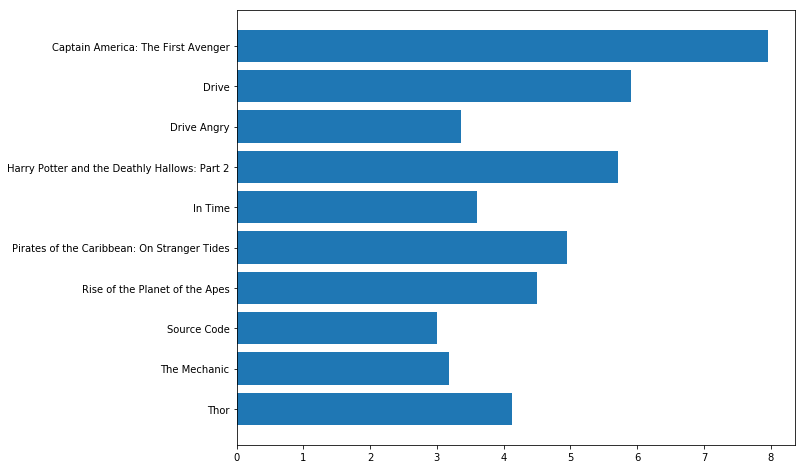

In [29]:
high_movie_popularity(2011)


the most popular movie in "2011" is **Captin America: the first avenger**



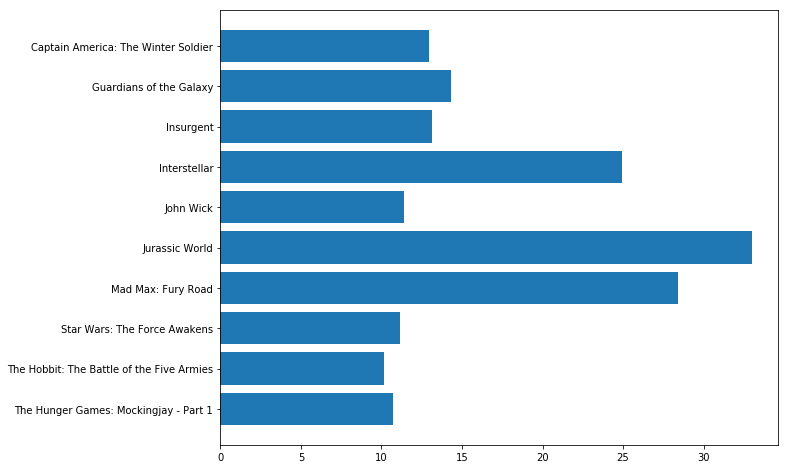

In [30]:
high_movie_popularity(2000,2015)


the most popular movie from 2000 to 2015 is **jurassic world**



### Q3 Which Genres have high popularity over all years ?


In [31]:
df["genres"].head(1)

0    Action|Adventure|Science Fiction|Thriller
Name: genres, dtype: object

__The biggest problem in answering this question is that we need to separate genres from each other
This is what we will do in the following lines__

In [32]:
#Separated geners from each other by and store each value in seperate columns 
genres_df = df['genres'].str.split("|", expand=True)
genres_df.head(3)


,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None


In [33]:
# Creating a separate dataframe form unique genres records.
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
0 0           Action
  1        Adventure
  2  Science Fiction
  3         Thriller
1 0           Action

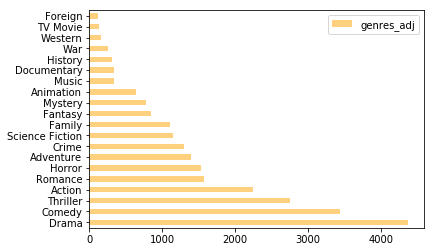

In [34]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df['genres_adj'].value_counts().plot(kind='barh',alpha=0.5, color= 'orange', label='genres_adj')
plt.legend();


__Drama__ is the most popular genre

### Conclusion
__our data suggest that:__
<ul>
    <li>we knew that revenue depend largely on "popularity", "Budget" , "vote_count"</li>
    <li>we discovered that a __jurassic world__ film is one of the most popular films Until 2015 </li>
    <li>the most popular type of films is __Drama__  </li>
</ul>

__there are a couple of limitations with our data:__
<ul>
    <li>There are many missing values in this data</li>
    <li>There are some wrong value in the data entered such as some values in 'runtime or relase_year' All these will lead either to wrong analysis which will lead to wrong predictions or biased analysis.</li>
    <li>There are some columns such as genres the values in them are connected by "|" and this makes it difficult to answer questions that depend on the comparison between these values</li>



</ul>

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0